In [39]:
import os, sys, math, warnings
warnings.filterwarnings('ignore')

from datetime import datetime, timedelta

import pandas as pd
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [13]:
csi300 = pd.read_csv("../data/510300.SS.csv")
csi300['Date'] = pd.to_datetime(csi300['Date'])
csi300 = csi300.set_index('Date')
treasury_rates = pd.read_csv("../data/treasury_rates.csv")

## 沪深 300 价格走势

<Axes: xlabel='Date'>

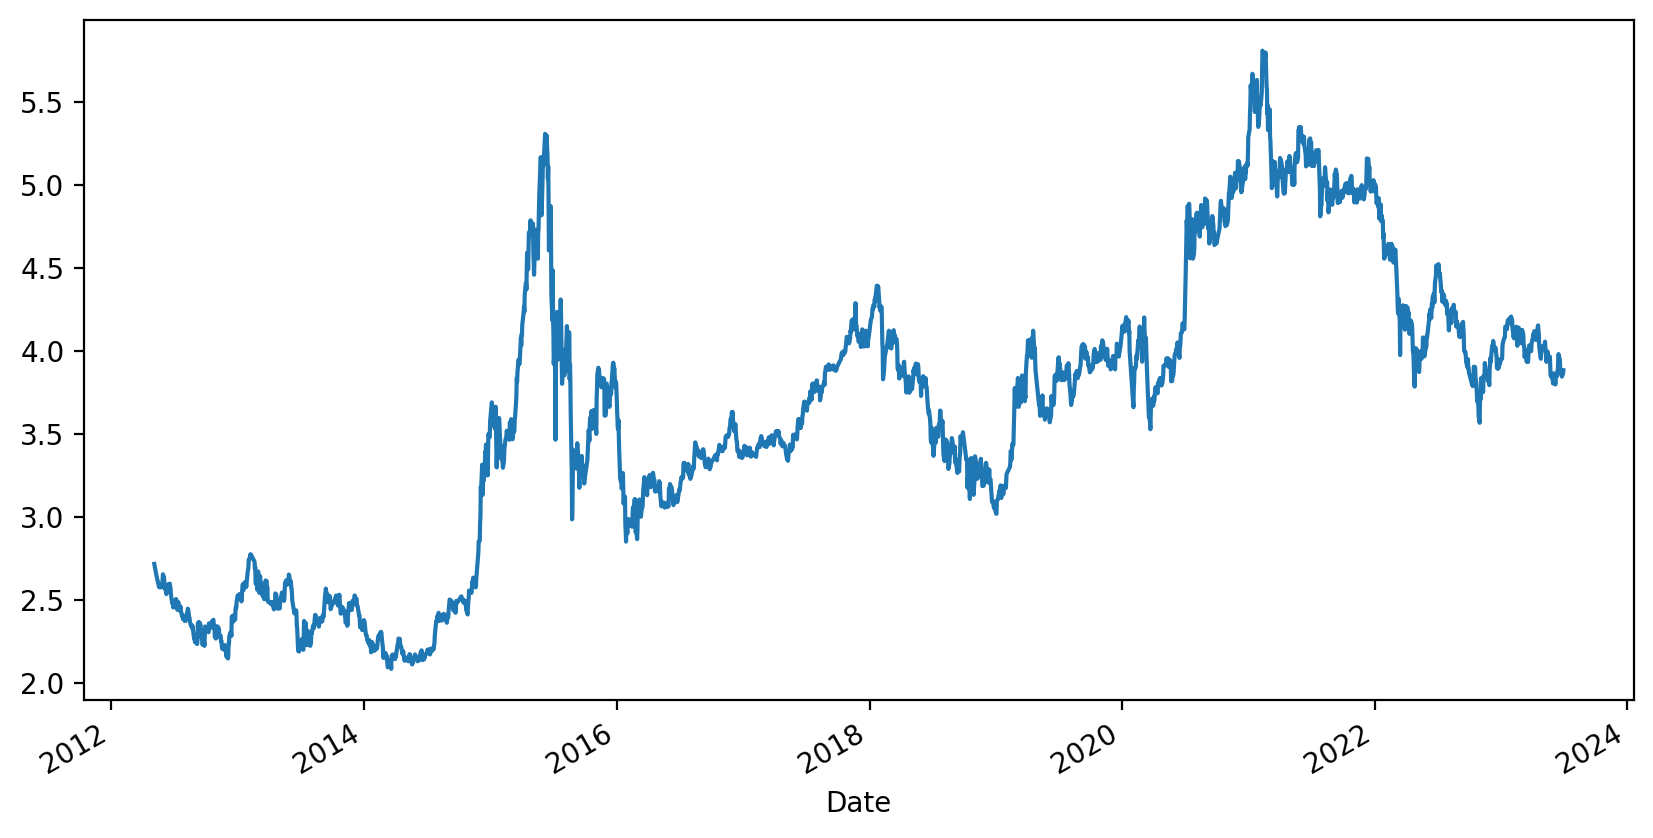

In [14]:
csi300['Adj Close'].plot.line(figsize=(10,5))

## 沪深 300 收益率和回撤

In [48]:
returns = csi300[['Adj Close']]
returns['Years'] = returns.apply(lambda x : (returns.index[-1] - x.name).days/365, axis=1)
returns['High'] = returns.apply(lambda x : returns[x.name:]['Adj Close'].max(), axis=1)
returns['Low'] = returns.apply(lambda x : returns[x.name:]['Adj Close'].min(), axis=1)
returns['Return'] = returns['Adj Close'][-1] / returns['Adj Close'] - 1
returns['MaxDrawdown'] = returns['Low'] / returns['High'] - 1

returns['CAGR'] = (returns['Return'] + 1)**(1/returns['Years']) - 1

returns[['Return', 'MaxDrawdown', 'CAGR']] = returns[['Return', 'MaxDrawdown', 'CAGR']]*100
returns.resample('Y').first()[-30:].round(2).to_markdown("../data/csi300_returns.txt")

## 沪深 300 定投策略

<Axes: xlabel='Date'>

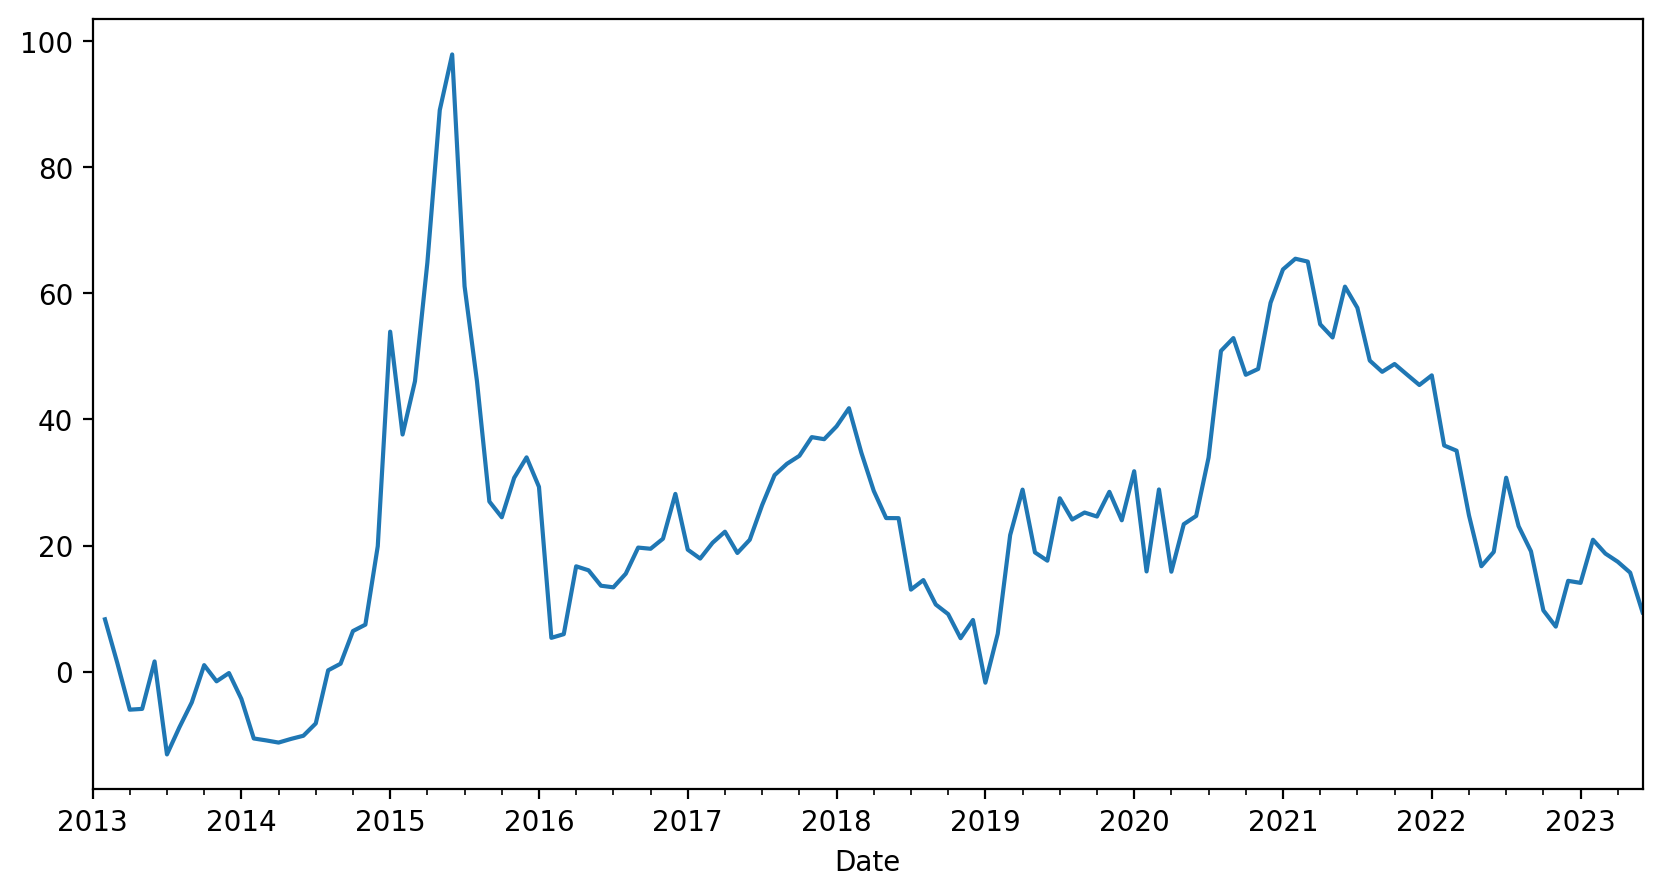

In [267]:
aip = csi300[['Adj Close']][datetime(2013,1,1):].resample('M').first()
aip['I'] = 1000
aip['SI'] = aip['I'].cumsum()
aip['C'] = aip['Adj Close'].pct_change() + 1

aip['V'] = aip['I']

for i in range(len(aip['V'])):
    if i == 0: continue
    aip['V'][i] = aip['V'][i-1] * aip['C'][i] + 1000

aip['R'] = (aip['V'] - 1000) / (aip['SI'] - 1000) * 100 - 100


aip.to_markdown("../data/csi300_aip.md")
aip['R'].plot.line(figsize=(10,5))

In [268]:
aip_returns = aip.resample('Y').last()[['Adj Close', 'SI', 'V', 'R']]

aip_returns

,Adj Close,SI,V,R
Date,,,,
2013-12-31,2.47,12000,11975.48,-0.22
2014-12-31,2.85,24000,28578.40,19.91
2015-12-31,3.64,36000,47895.62,33.99
2016-12-31,3.63,48000,61250.80,28.19
2017-12-31,4.06,60000,81755.04,36.87
2018-12-31,3.32,72000,77819.05,8.20
2019-12-31,3.89,84000,103925.30,24.01
2020-12-31,5.14,96000,151588.47,58.51
2021-12-31,4.92,108000,156654.57,45.47


## 沪深 300 估值分位数

In [279]:
csi300_pe = pd.read_csv("../data/csi300_pe.csv")
csi300_pe['date'] = pd.to_datetime(csi300_pe['date'])
csi300_pe = csi300_pe.set_index("date")

<Axes: xlabel='date'>

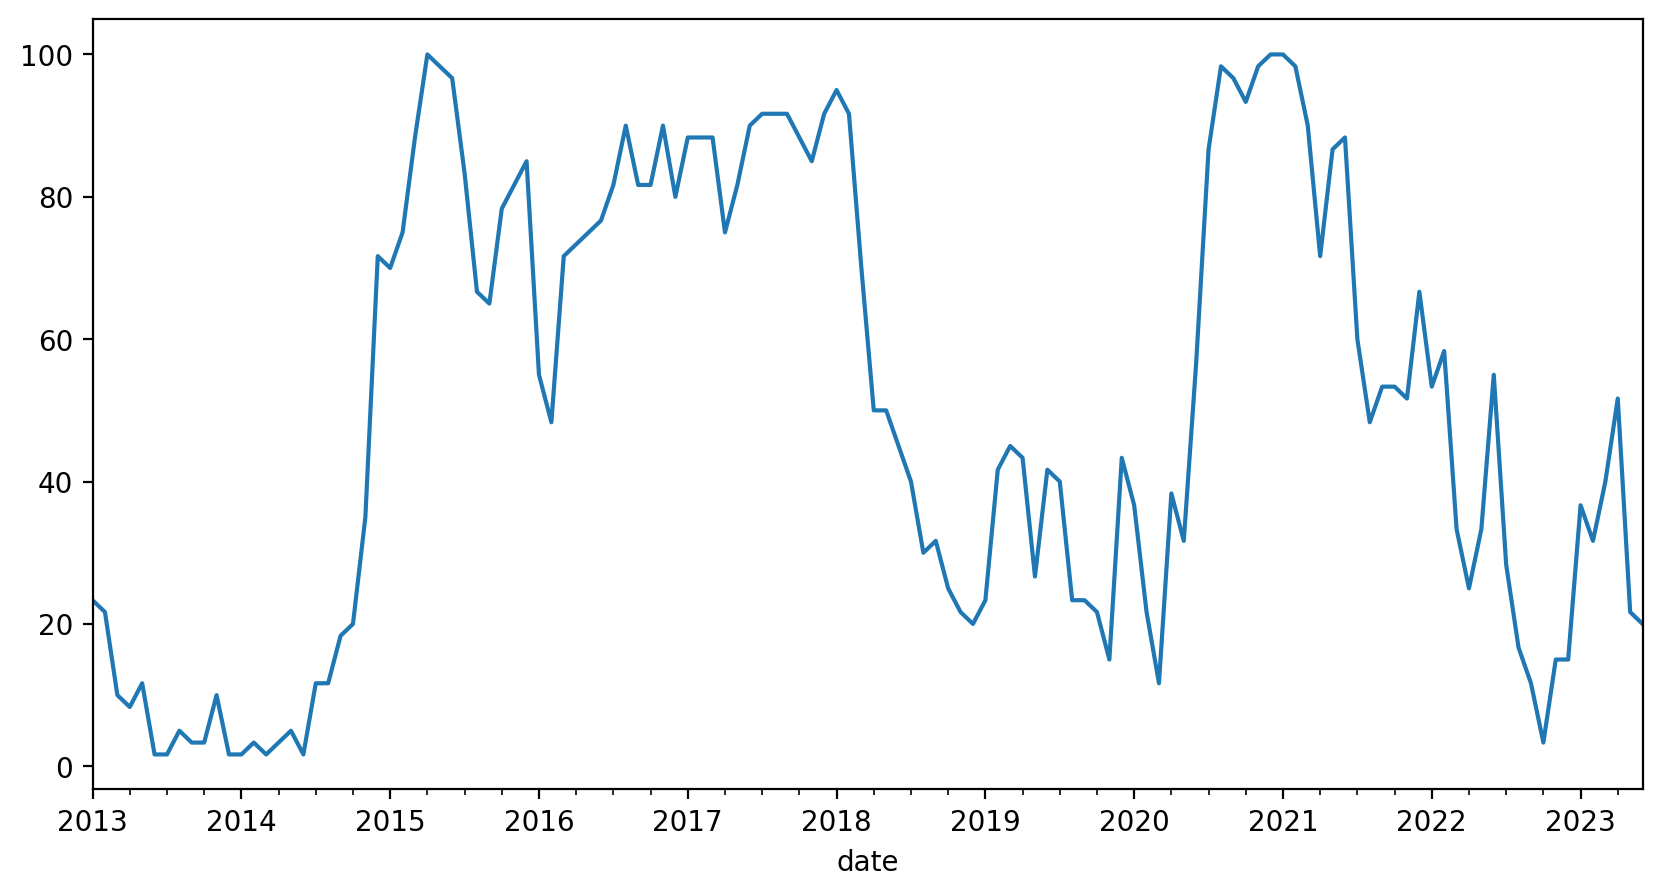

In [288]:
(csi300_pe.resample('M').last()['trailing_pe'].rolling(60).rank(pct=True)*100)[datetime(2013,1,1):].plot.line(figsize=(10,5))

## 格雷厄姆指数

In [298]:
treasury_rates = pd.read_csv("../data/treasury_rates.csv", parse_dates=['date']).set_index('date').resample('M').last()


<Axes: xlabel='date'>

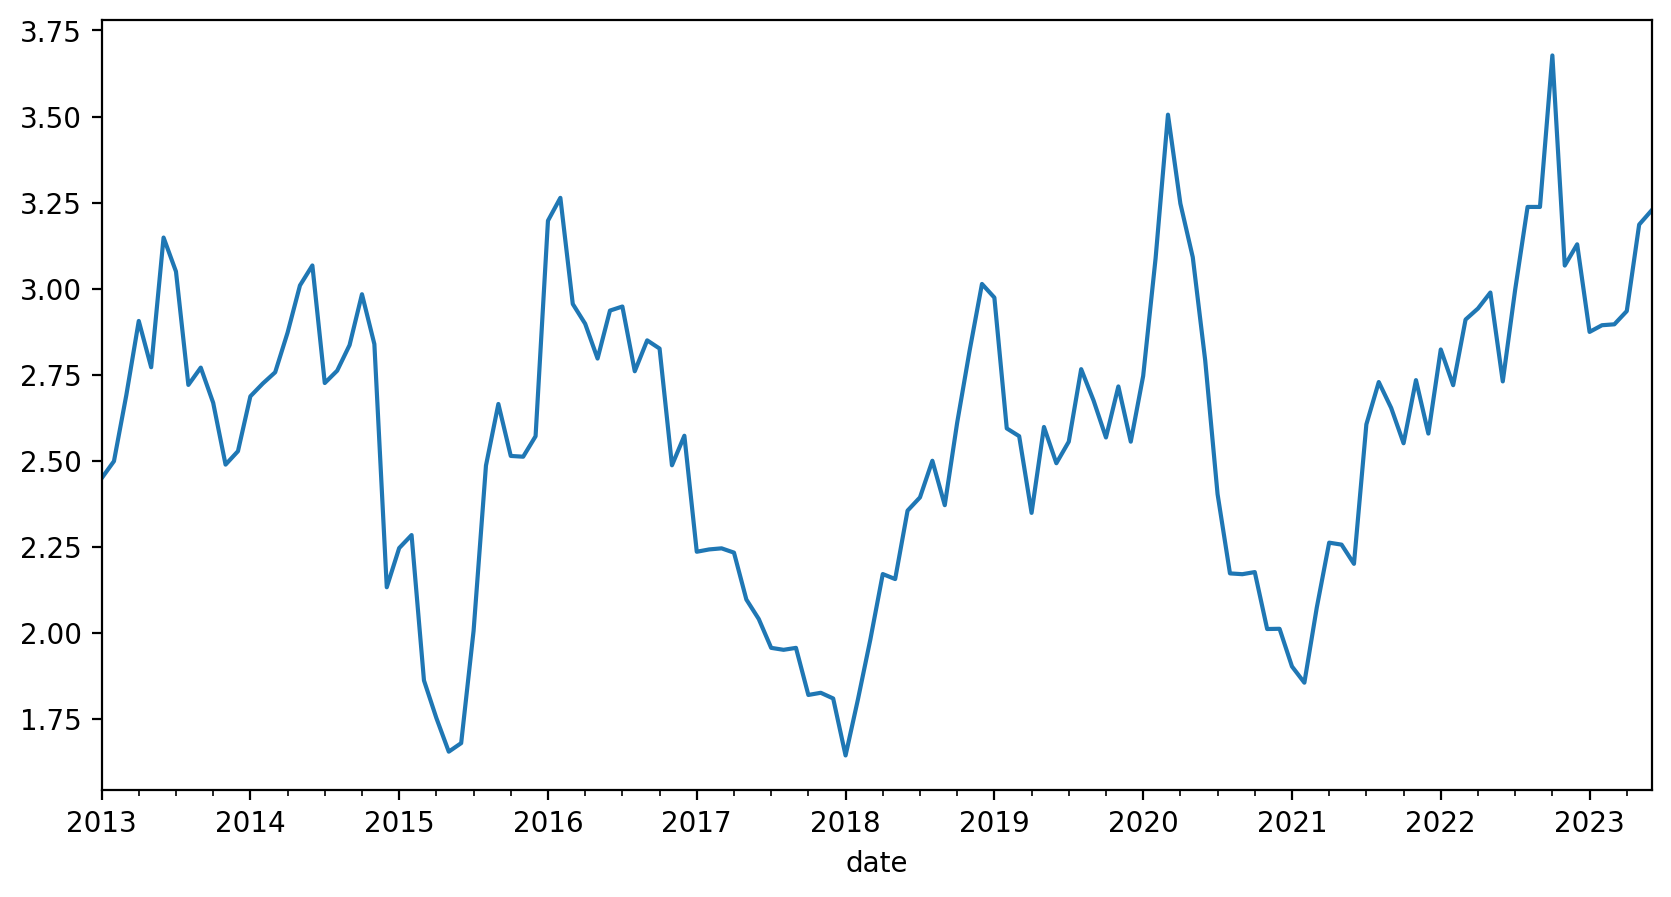

In [305]:
gi = 1/csi300_pe.resample('M').last()['trailing_pe']/treasury_rates['cn_10y']*100

gi[datetime(2013,1,1):].plot.line(figsize=(10,5))

In [302]:
treasury_rates

,cn_2y,cn_10y,us_2y,us_10y
date,,,,
2002-01-31,2.43,3.22,3.16,5.07
2002-02-28,2.20,3.13,3.06,4.88
2002-03-31,2.01,2.86,3.72,5.42
2002-04-30,2.00,2.50,3.24,5.11
2002-05-31,1.92,2.38,3.22,5.08
...,...,...,...,...
2023-02-28,2.49,2.90,4.81,3.92
2023-03-31,2.39,2.85,4.10,3.55
2023-04-30,2.35,2.78,4.04,3.44
